<a href="https://colab.research.google.com/github/LostUniavan/ClassifierSigmoid/blob/main/Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

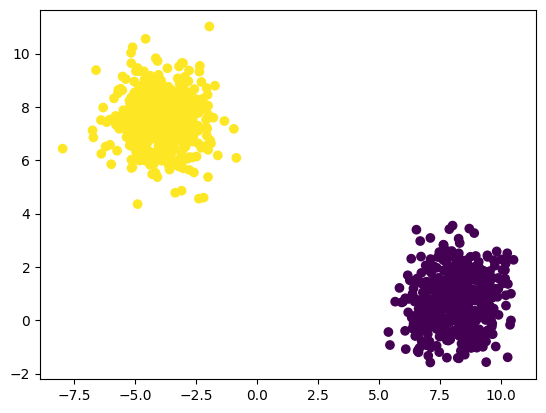

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

blobs = make_blobs(n_samples=1000, n_features=2, centers=2)

X = blobs[0]
C = blobs[1]
plt.scatter(X[:,0], X[:,1] ,c=C)
plt.show()
arquivo = open('arq_treinamento.csv','w')
arquivo2 = open('arq_valida.csv','w')

i = 0
for x in blobs[0]:
    if ((i % 2) == 0):
        if (C[i] > 0):
            arquivo.write(str(x[0])+","+str(x[1])+","+str(C[i])+"\n")
        else:
            arquivo.write(str(x[0]) + "," + str(x[1]) + ",-1\n")
    else:
        arquivo2.write(str(x[0])+","+str(x[1])+"\n")

    i += 1
arquivo.close()
arquivo2.close()

Treinamento completo em 2 epochs.


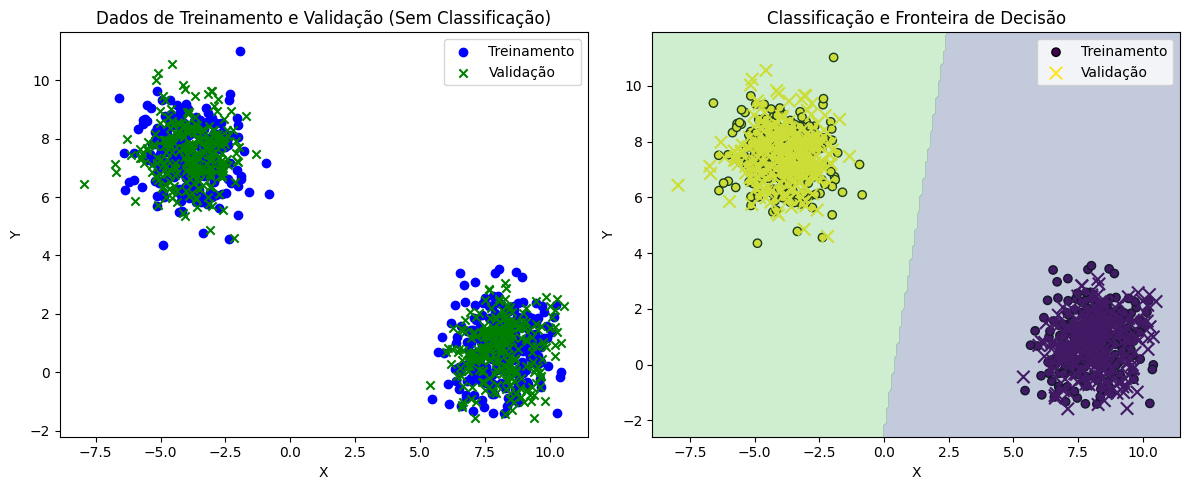

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(x):
    z = np.dot(w, x) + b
    y_pred = np.where(sigmoid(z) > 0.5, 1, -1)
    return y_pred

X_treinamento = np.loadtxt('arq_treinamento.csv', delimiter=',', usecols=(0, 1))
C_treinamento = np.loadtxt('arq_treinamento.csv', delimiter=',', usecols=(2,), dtype=int)

np.random.seed(0)
w = np.random.randn(2)
b = np.random.randn(1)

learning_rate = 0.1
max_epochs = 1000#float('inf')
epoch = 0

while epoch < max_epochs:
    epoch += 1
    errors = 0
    for x, c in zip(X_treinamento, C_treinamento):
        z = np.dot(w, x) + b
        y_pred = np.where(sigmoid(z) > 0.5, 1, -1)
        error = c - y_pred
        if error != 0:
            errors += 1
            w += learning_rate * error * x
            b += learning_rate * error
    if errors == 0:
        break

print(f'Treinamento completo em {epoch} epochs.')

X_validacao = np.loadtxt('arq_valida.csv', delimiter=',')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[::2, 0], X[::2, 1], color='blue', label='Treinamento')
plt.scatter(X[1::2, 0], X[1::2, 1], color='green', marker='x', label='Validação')
plt.title('Dados de Treinamento e Validação (Sem Classificação)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_treinamento[:, 0], X_treinamento[:, 1], c=C_treinamento, cmap='viridis', edgecolors='k', label='Treinamento')

y_pred_validacao = np.array([predict(x) for x in X_validacao])
plt.scatter(X_validacao[:, 0], X_validacao[:, 1], c=y_pred_validacao, cmap='viridis', marker='x', s=80, label='Validação')

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = predict(grid.T).reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, levels=[-1, 0, 1], alpha=0.3, cmap='viridis')

plt.title('Classificação e Fronteira de Decisão')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()